# Visualizations

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Costs

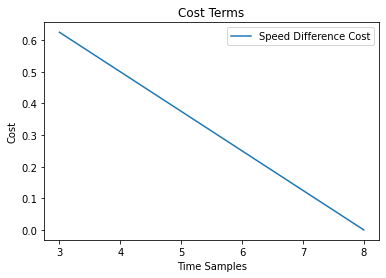

In [61]:
cost_t = (1 - times/8)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(times, cost_t, label='Speed Difference Cost')  # Plot some data on the axes.
ax.set_xlabel('Time Samples')  # Add an x-label to the axes.
ax.set_ylabel('Cost')  # Add a y-label to the axes.
ax.set_title("Cost Terms")  # Add a title to the axes.
ax.legend();  # Add a legend.

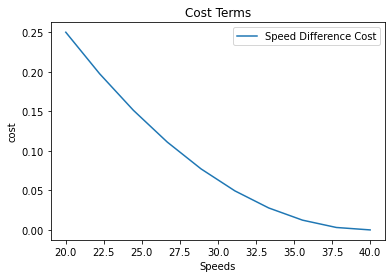

In [62]:
cost_v = (1 - speeds/40)**2
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(speeds, cost_v, label='Speed Difference Cost')  # Plot some data on the axes.
ax.set_xlabel('Speeds')  # Add an x-label to the axes.
ax.set_ylabel('cost')  # Add a y-label to the axes.
ax.set_title("Cost Terms")  # Add a title to the axes.
ax.legend();  # Add a legend.

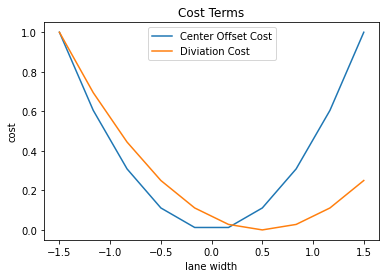

In [63]:
cost_offset = (widths/1.5)**2
cost_diviate = ((widths - 0.5)/2)**2
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(widths, cost_offset, label='Center Offset Cost')  # Plot some data on the axes.
ax.plot(widths, cost_diviate, label='Diviation Cost')
ax.set_xlabel('lane width')  # Add an x-label to the axes.
ax.set_ylabel('cost')  # Add a y-label to the axes.
ax.set_title("Cost Terms")  # Add a title to the axes.
ax.legend();  # Add a legend.

Sampled 500 End States
(10, 10, 5) float64


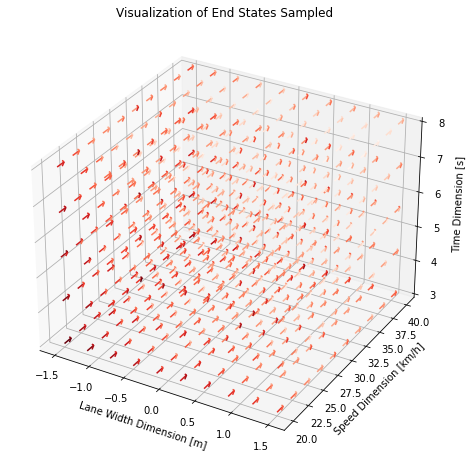

In [89]:
widths = np.linspace(-1.5, 1.5, 10)
speeds = np.linspace(20, 40, 10)
times = np.linspace(3, 8, 5)
num_stats = widths.size * speeds.size * times.size
print("Sampled", num_stats, "End States")

ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(widths, speeds, times)

# Make the direction data for the arrows
u = np.sin(0 * x)
v = 2*np.cos(0 * x)
w = np.sin(0 * x)

q = ax.quiver(x, y, z, u, v, w, length=1.0, cmap='Reds', normalize=True)

color = np.zeros(x.shape)
for i in range(x.shape[0]):
    cost_offset = ((i - x.shape[0]/2)/(x.shape[0]/2))**2
    for j in range(x.shape[1]):
        cost_v = (1 - j/x.shape[1])**2
        for k in range(x.shape[2]):
            cost_t = (1 - k/x.shape[2])
            color[i][j][k] = cost_offset + cost_v + cost_t
            
print(color.shape, color.dtype)

# q.set_array(np.random.rand(np.prod(y.shape)))
q.set_array(color.ravel())
ax.set_xlabel('Lane Width Dimension [m]')
ax.set_ylabel('Speed Dimension [km/h]')
ax.set_zlabel('Time Dimension [s]')
ax.set_title("Visualization of End States Sampled")  # Add a title to the axes.

plt.show()

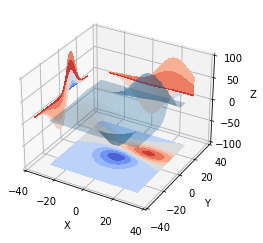

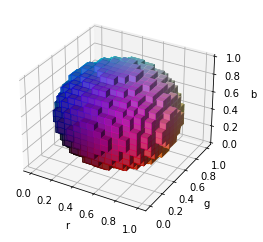

In [64]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')

plt.show()